In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # Force fresh mount

Mounted at /content/drive


In [3]:

  !pip install ultralytics numpy opencv-python split-folders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
import os

# Update this path to your dataset location in Google Drive
dataset_path = "/content/drive/MyDrive/dataset"

train_images = os.path.join(dataset_path, "training/images")
train_masks = os.path.join(dataset_path, "training/masks")
test_images = os.path.join(dataset_path, "testing/images")
test_masks = os.path.join(dataset_path, "testing/masks")

In [5]:
import os
import cv2
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define paths (UPDATE THESE TO YOUR ACTUAL PATHS)
dataset_path = "/content/drive/MyDrive/dataset"  # Change to your dataset path
train_images = os.path.join(dataset_path, "training/images")
train_masks = os.path.join(dataset_path, "training/masks")

# Create labels directory if it doesn't exist
os.makedirs(os.path.join(dataset_path, "training/labels"), exist_ok=True)

def mask_to_yolo(mask_path, output_txt_path):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        print(f"Error: Could not read mask at {mask_path}")
        return

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    with open(output_txt_path, 'w') as f:
        for contour in contours:
            contour = contour.squeeze()
            if len(contour) < 3:
                continue
            normalized_contour = contour / np.array([mask.shape[1], mask.shape[0]])
            yolo_line = "0 " + " ".join([f"{x:.6f} {y:.6f}" for x, y in normalized_contour])
            f.write(yolo_line + "\n")

# Test conversion on the first mask
sample_mask = os.listdir(train_masks)[0]
mask_to_yolo(
    os.path.join(train_masks, sample_mask),
    os.path.join(dataset_path, "training/labels", os.path.splitext(sample_mask)[0] + ".txt")
)

print("Conversion test successful!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Conversion test successful!


In [6]:
os.makedirs(os.path.join(dataset_path, "training/labels"), exist_ok=True)

In [7]:
  print("Sample .txt file content:")
with open(os.path.join(dataset_path, "training/labels", os.path.splitext(sample_mask)[0] + ".txt"), 'r') as f:
    print(f.read())

Sample .txt file content:



In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n-seg.pt")
model.train(data="/content/drive/MyDrive/dataset/dataset.yaml", epochs=10)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.74M/6.74M [00:00<00:00, 132MB/s]


Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/dataset/dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

100%|██████████| 755k/755k [00:00<00:00, 24.5MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1LP0_BbrOZIEcKu24WzLy7Q3fLkRQpZCz/dataset/training/labels... 1730 images, 437 backgrounds, 0 corrupt: 100%|██████████| 1740/1740 [10:08<00:00,  2.86it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1LP0_BbrOZIEcKu24WzLy7Q3fLkRQpZCz/dataset/training/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/.shortcut-targets-by-id/1LP0_BbrOZIEcKu24WzLy7Q3fLkRQpZCz/dataset/testing/labels... 360 images, 96 backgrounds, 0 corrupt: 100%|██████████| 360/360 [02:08<00:00,  2.80it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1LP0_BbrOZIEcKu24WzLy7Q3fLkRQpZCz/dataset/testing/labels.cache
Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.62G      1.267      2.798      2.638      1.539         24        640: 100%|██████████| 109/109 [00:51<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]

                   all        360        954       0.58      0.527      0.542      0.322       0.56      0.509       0.51      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.25G      1.217      2.329       1.97      1.478         25        640: 100%|██████████| 109/109 [00:43<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.50it/s]

                   all        360        954      0.477      0.567      0.498      0.264      0.478      0.556       0.48       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.26G      1.241      2.313      1.778      1.504         17        640: 100%|██████████| 109/109 [00:43<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]


                   all        360        954      0.491      0.584      0.483       0.26      0.461      0.553      0.435        0.2

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.28G      1.203      2.187      1.611      1.461         25        640: 100%|██████████| 109/109 [00:43<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]

                   all        360        954      0.639       0.64      0.657      0.413      0.636      0.591      0.629      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.28G      1.156      2.096      1.481      1.422         31        640: 100%|██████████| 109/109 [00:42<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]

                   all        360        954       0.58      0.599      0.581      0.353      0.575      0.578      0.556      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.28G      1.102      2.033      1.394      1.378         34        640: 100%|██████████| 109/109 [00:43<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.08it/s]


                   all        360        954      0.623      0.661      0.676      0.447      0.669      0.589      0.643      0.371

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.28G      1.065      1.936      1.304      1.341         22        640: 100%|██████████| 109/109 [00:43<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]

                   all        360        954      0.657      0.656      0.679      0.459       0.65       0.65       0.66      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.28G      0.997       1.84       1.23      1.305         31        640: 100%|██████████| 109/109 [00:44<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]

                   all        360        954      0.671      0.643      0.671      0.448      0.659      0.631      0.648      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.28G      0.964      1.762      1.179      1.277         28        640: 100%|██████████| 109/109 [00:42<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.73it/s]


                   all        360        954      0.668      0.678      0.709      0.488      0.664      0.664      0.689      0.424

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.28G     0.9208      1.691      1.133      1.252         31        640: 100%|██████████| 109/109 [00:42<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]


                   all        360        954       0.68      0.688      0.723      0.505      0.676      0.679      0.708       0.45

10 epochs completed in 0.143 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,844 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/12 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   8%|▊         | 1/12 [00:00<00:06,  1.77it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  17%|█▋        | 2/12 [00:02<00:11,  1.11s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


                   all        360        954       0.68      0.689      0.723      0.505      0.676      0.679      0.708       0.45
                 paved        264        954       0.68      0.689      0.723      0.505      0.676      0.679      0.708       0.45
Speed: 0.4ms preprocess, 4.2ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0e3e674350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [8]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/dataset/best.pt")
model.predict("/content/drive/MyDrive/dataset/testing/images/00001.png", save=True, conf=0.5)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/drive/MyDrive/dataset/testing/images/00001.png: 640x640 6 paveds, 510.3ms
Speed: 14.2ms preprocess, 510.3ms inference, 72.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'paved', 1: 'unpaved', 2: 'vegetation', 3: 'water'}
 obb: None
 orig_img: array([[[ 95,  87,  95],
         [ 95,  87,  91],
         [ 91,  83,  91],
         ...,
         [ 61,  52,  42],
         [ 91,  87,  83],
         [ 95,  91,  87]],
 
        [[ 99,  91,  99],
         [ 99,  91,  95],
         [ 95,  87,  95],
         ...,
         [ 67,  58,  52],
         [ 99,  91,  91],
         [107, 103,  99]],
 
        [[ 99,  91,  99],
         [ 95,  87,  95],
         [ 95,  87,  95],
         ...,
         [ 76,  70,  70],
         [ 87,  83,  77],
         [111, 103, 103]],
 
        ...,
 
        [[ 82,  82,  82],
         [ 87,  83,  83],
         [ 82,  82,  82],
         ...,
         [111, 111, 119],
         [111, 111, 119],
         [107, 111, 115]],
 
        [[ 82,  82,  86],
       

In [9]:
model.export(format="onnx")  # For TensorRT/OpenVINO

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/drive/MyDrive/dataset/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 40, 8400), (1, 32, 160, 160)) (6.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 266.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 305.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 266.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 257.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 269.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 17.3s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1

'/content/drive/MyDrive/dataset/best.onnx'

In [9]:
import numpy as np
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/dataset/best.pt")
results = model.predict("/content/drive/MyDrive/dataset/testing/images/00004.png")

for result in results:
    # Get masks and boxes
    masks = result.masks.data.cpu().numpy()  # Shape: (N, H, W)
    boxes = result.boxes.data.cpu().numpy()   # [x1,y1,x2,y2,conf,class]

    for i, (box, mask) in enumerate(zip(boxes, masks)):
        x1, y1, x2, y2, conf, cls_id = box
        area_pixels = mask.sum()

        # Landing site criteria (adjust thresholds)
        if (area_pixels > 5000 and              # Minimum size (e.g., 50x100 pixels)
            conf > 0.5 and                      # Confidence threshold
            cls_id == 0):                       # Only 'landing_site' class
            print(f"Suitable Site {i+1}:")
            print(f"- Confidence: {conf:.2f}")
            print(f"- Area: {area_pixels} pixels")
            print(f"- Bounding Box: {[x1, y1, x2, y2]}")


image 1/1 /content/drive/MyDrive/dataset/testing/images/00004.png: 640x640 2 paveds, 278.7ms
Speed: 3.8ms preprocess, 278.7ms inference, 10.2ms postprocess per image at shape (1, 3, 640, 640)
Suitable Site 1:
- Confidence: 0.52
- Area: 25386.0 pixels
- Bounding Box: [np.float32(0.0), np.float32(0.0), np.float32(97.680214), np.float32(64.49459)]


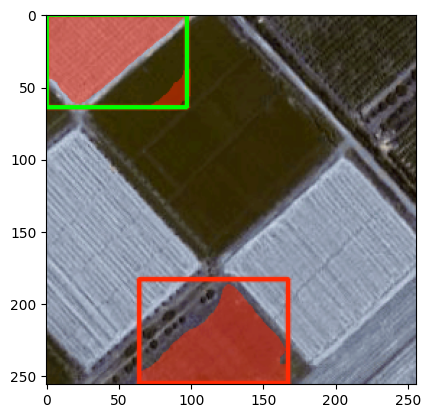

In [10]:
import matplotlib.pyplot as plt

# Plot results with custom labels
result_img = result.plot(conf=False, labels=False, masks=True)

# Add custom annotations
for box in boxes:
    x1, y1, x2, y2, conf, cls_id = box
    if conf > 0.5 and cls_id == 0:
        cv2.rectangle(result_img, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)
        cv2.putText(result_img, f"Landing Site {conf:.2f}", (int(x1), int(y1)-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

plt.imshow(result_img)
plt.show()

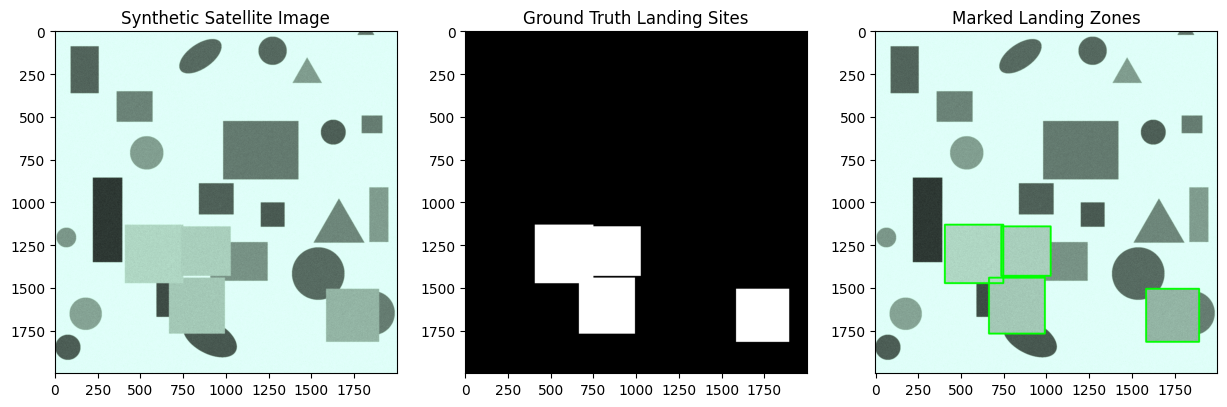

Generated 4 landing sites at coordinates: [(1585, 1507, 310, 310), (666, 1442, 327, 327), (408, 1132, 342, 342), (738, 1142, 289, 289)]


In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.draw import random_shapes

def generate_landing_test_image(img_size=2000, min_landing_size=150, max_landing_size=400):
    """
    Generates a synthetic satellite image with random terrain and potential landing sites

    Parameters:
    - img_size: Output image size (square)
    - min_landing_size: Minimum landing zone size in pixels
    - max_landing_size: Maximum landing zone size in pixels

    Returns:
    - RGB image with simulated terrain
    - Binary mask of landing sites
    - List of landing site coordinates (x, y, w, h)
    """
    # Generate random terrain background (darker colors)
    terrain, _ = random_shapes(
        (img_size, img_size),
        min_shapes=15,
        max_shapes=30,
        min_size=100,
        max_size=500,
        channel_axis=None,  # Changed from multichannel=False
        intensity_range=(50, 150)  # Darker background
    )

    # Create empty mask for landing sites
    landing_mask = np.zeros((img_size, img_size), dtype=np.uint8)

    # Add 2-4 potential landing sites (brighter rectangles)
    landing_sites = []
    for _ in range(np.random.randint(2, 5)):
        y1 = np.random.randint(0, img_size - max_landing_size)
        x1 = np.random.randint(0, img_size - max_landing_size)
        h = w = np.random.randint(min_landing_size, max_landing_size)

        # Create smooth rectangular area
        cv2.rectangle(terrain, (x1, y1), (x1+w, y1+h),
                     (180 + np.random.randint(-20, 20)), -1)
        cv2.rectangle(landing_mask, (x1, y1), (x1+w, y1+h), 255, -1)
        landing_sites.append((x1, y1, w, h))

    # Add realistic noise and blur
    terrain = cv2.GaussianBlur(terrain, (7, 7), 0)
    terrain = np.clip(terrain + np.random.randn(*terrain.shape) * 15, 0, 255).astype(np.uint8)

    # Convert to 3-channel "satellite" image
    img = cv2.merge([terrain, terrain, terrain])

    # Add slight color variations (green/brown hues)
    img[:,:,0] = np.clip(terrain * 0.9, 0, 255)  # Blue channel
    img[:,:,1] = np.clip(terrain * 1.1, 0, 255)  # Green channel

    return img, landing_mask, landing_sites

# Generate and display test image
img, mask, sites = generate_landing_test_image()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Synthetic Satellite Image")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Ground Truth Landing Sites")

# Draw landing site boxes on original image
annotated_img = img.copy()
for x, y, w, h in sites:
    cv2.rectangle(annotated_img, (x, y), (x+w, y+h), (0, 255, 0), 10)

plt.subplot(1, 3, 3)
plt.imshow(annotated_img)
plt.title("Marked Landing Zones")
plt.show()

# Save for testing
cv2.imwrite("synthetic_test_landing.jpg", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
cv2.imwrite("synthetic_test_mask.png", mask)
print(f"Generated {len(sites)} landing sites at coordinates: {sites}")

In [ ]:
!pip install flask_ngrok pyngrok ultralytics opencv-python numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall


image 1/1 /content/drive/MyDrive/dataset/testing/images/00001.png: 640x640 7 paveds, 407.6ms
Speed: 4.8ms preprocess, 407.6ms inference, 80.6ms postprocess per image at shape (1, 3, 640, 640)

Detection 1:
- Terrain Type: MOUNTAIN
- Confidence: 0.84
- Area: 53939 pixels
- Bounding Box: [167, 110, 255, 218]
- Safety Status: SAFE

Detection 2:
- Terrain Type: COASTAL
- Confidence: 0.68
- Area: 27703 pixels
- Bounding Box: [1, 0, 131, 50]
- Safety Status: SAFE

Detection 3:
- Terrain Type: COASTAL
- Confidence: 0.65
- Area: 12325 pixels
- Bounding Box: [162, 227, 255, 255]
- Safety Status: SAFE

Detection 4:
- Terrain Type: SAFE
- Confidence: 0.58
- Area: 76374 pixels
- Bounding Box: [2, 12, 218, 115]
- Safety Status: SAFE

Detection 5:
- Terrain Type: SAFE
- Confidence: 0.57
- Area: 104394 pixels
- Bounding Box: [1, 119, 162, 248]
- Safety Status: SAFE

Detection 6:
- Terrain Type: SAFE
- Confidence: 0.51
- Area: 64316 pixels
- Bounding Box: [6, 22, 162, 114]
- Safety Status: SAFE

Dete

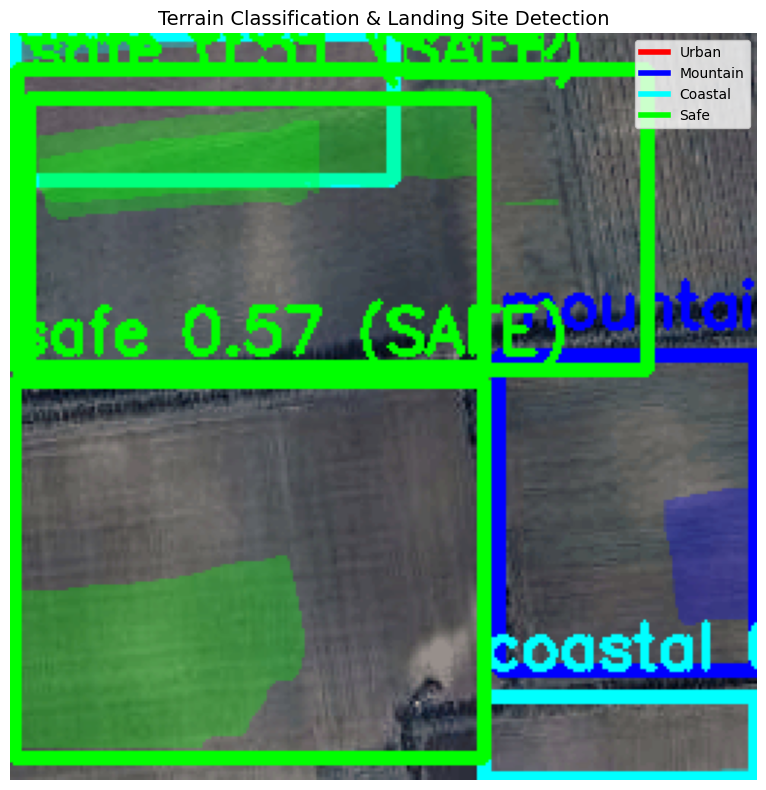


Result saved to: /content/drive/MyDrive/dataset/results/detection_result.jpg


In [12]:
import numpy as np
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load model
model = YOLO("/content/drive/MyDrive/dataset/best.pt")

# Define terrain color coding (BGR format)
TERRAIN_COLORS = {
    'urban': (0, 0, 255),      # Red
    'mountain': (255, 0, 0),   # Blue
    'coastal': (255, 255, 0),  # Cyan
    'safe': (0, 255, 0),       # Green
}

def classify_terrain(mask_area, avg_color, box_coords):
    """Improved terrain classification with better thresholds"""
    x1, y1, x2, y2 = box_coords
    width = x2 - x1
    height = y2 - y1
    aspect_ratio = width / height

    # Convert avg_color to BGR if needed (OpenCV uses BGR)
    avg_bgr = avg_color[::-1] if len(avg_color) == 3 else (0, 0, 0)

    # Urban areas tend to have higher red channel and lower saturation
    if avg_bgr[2] > 150 and avg_bgr[2] > avg_bgr[1]*1.2:
        return 'urban'
    # Coastal areas often have blue-ish tones and wider aspect ratio
    elif aspect_ratio > 1.5 and avg_bgr[0] > avg_bgr[1]:
        return 'coastal'
    # Mountainous areas are often taller than wide with earth tones
    elif height > width and avg_bgr[1] < 100:
        return 'mountain'
    else:
        return 'safe'

# Process image
results = model.predict("/content/drive/MyDrive/dataset/testing/images/00001.png")

for result in results:
    masks = result.masks.data.cpu().numpy() if result.masks else []
    boxes = result.boxes.data.cpu().numpy()
    img = result.orig_img.copy()

    for i, (box, mask) in enumerate(zip(boxes, masks)):
        x1, y1, x2, y2, conf, cls_id = box
        area_pixels = mask.sum() if mask.size > 0 else 0

        # Get region of interest
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        roi = img[y1:y2, x1:x2]

        # Calculate average color in the masked area
        avg_color = np.mean(roi, axis=(0, 1)) if roi.size > 0 else (0, 0, 0)

        # Classify terrain
        terrain_type = classify_terrain(area_pixels, avg_color, (x1, y1, x2, y2))

        # Landing site criteria
        is_safe = (area_pixels > 5000 and conf > 0.5 and cls_id == 0)

        # Print detection info
        print(f"\nDetection {i+1}:")
        print(f"- Terrain Type: {terrain_type.upper()}")
        print(f"- Confidence: {conf:.2f}")
        print(f"- Area: {area_pixels:.0f} pixels")
        print(f"- Bounding Box: [{x1}, {y1}, {x2}, {y2}]")
        print(f"- Safety Status: {'SAFE' if is_safe else 'UNSAFE'}")

        # Get color for visualization
        color = TERRAIN_COLORS[terrain_type]
        thickness = 3 if is_safe else 1

        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

        # Draw label
        label = f"{terrain_type} {conf:.2f}{' (SAFE)' if is_safe else ''}"
        cv2.putText(img, label, (x1, y1-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

        # Draw mask if available
        if mask.size > 0:
            # Resize mask to ROI dimensions
            mask_resized = cv2.resize(mask.astype(np.float32), (x2-x1, y2-y1))

            # Create colored mask
            mask_color = np.zeros_like(roi)
            mask_color[:] = color

            # Apply transparent overlay
            alpha = 0.3 * mask_resized[..., np.newaxis]  # Proper alpha channel
            img[y1:y2, x1:x2] = (img[y1:y2, x1:x2] * (1 - alpha) + mask_color * alpha).astype(np.uint8)

# Display results
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Add legend
legend_elements = [
    plt.Line2D([0], [0], color=np.array(color[::-1])/255, lw=4, label=f"{name.capitalize()}")
    for name, color in TERRAIN_COLORS.items()
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.title("Terrain Classification & Landing Site Detection", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

# Save result
output_path = "/content/drive/MyDrive/dataset/results/detection_result.jpg"
cv2.imwrite(output_path, img)  # img is already in BGR format
print(f"\nResult saved to: {output_path}")